In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data Length
NClasses = 500
# Input Size
D = 2
# Hidden layer size
H = 3
# Number of classes
C = 3

In [3]:
X1 = np.random.randn(NClasses, D) + np.array([0,-2])
X2 = np.random.randn(NClasses, D) + np.array([2,2])
X3 = np.random.randn(NClasses, D) + np.array([-2,0])

X = np.vstack([X1,X2,X3]).astype(np.float32)

In [4]:
X.shape

(1500, 2)

In [5]:
Y = np.array([0]*NClasses + [1]*NClasses + [2]*NClasses)

In [6]:
Y.shape

(1500,)

In [7]:
X[:5]

array([[-1.3352984 , -1.8128676 ],
       [-0.03401105, -0.605853  ],
       [-0.4051476 , -0.32015604],
       [-0.5080134 , -3.3962271 ],
       [ 0.4540411 , -1.849749  ]], dtype=float32)

In [9]:
Y[:5]

array([0, 0, 0, 0, 0])

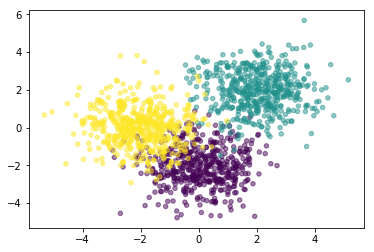

In [10]:
plt.scatter(X[:,0], X[:,1], c=Y, s=20, alpha=0.5)

In [11]:
N = len(Y)

In [12]:
T = np.zeros((N,H))

In [13]:
T.shape

(1500, 3)

In [14]:
for i in range(N):
    T[i, Y[i]] = 1

In [15]:
T[0],T[500],T[1000]

(array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.]))

In [13]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

In [14]:
def feedForward(X,W1,B1,W2,B2):
    Z = tf.nn.sigmoid(tf.matmul(X,W1)+ B1)
    return tf.matmul(Z,W2) + B2

In [15]:
tfX = tf.placeholder(tf.float32, shape=(None, D))
tfY = tf.placeholder(tf.float32, shape=(None, H))

In [16]:
W1 = init_weights([D,H])
B1 = init_weights([H])
W2 = init_weights([H,C])
B2 = init_weights([C])

In [17]:
logits = feedForward(X,W1,B1,W2,B2)

In [18]:
logits

<tf.Tensor 'add_1:0' shape=(1500, 3) dtype=float32>

In [19]:
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tfY, logits=logits))

In [20]:
trainOutput = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [21]:
predictOutput = tf.argmax(logits,1)

In [22]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [25]:
for i in range(1000):
    sess.run(trainOutput, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predictOutput, feed_dict={tfX: X, tfY: T})
    if i % 100 == 0:
        print("Accuracy:", np.mean(Y == pred))

Accuracy: 0.333333333333
Accuracy: 0.333333333333
Accuracy: 0.333333333333
Accuracy: 0.333333333333
Accuracy: 0.341333333333
Accuracy: 0.334666666667
Accuracy: 0.333333333333
Accuracy: 0.338666666667
Accuracy: 0.410666666667
Accuracy: 0.531333333333


In [26]:
import pandas as pd

In [29]:
iris = pd.read_csv('iris.csv')

In [30]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
X = iris.iloc[:,1:-1]

In [33]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
Y = iris['Species']

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encode = LabelEncoder()
Y = encode.fit_transform(Y)

In [38]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [39]:
from sklearn.datasets import load_iris

In [42]:
dataset = load_iris()

In [43]:
X = dataset.data

In [45]:
Y = dataset.target

In [46]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)